In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from google.colab import files
uploaded = files.upload()  # ফাইল সিলেক্ট করুন (cardio_train.csv)

Saving cardio_train.csv to cardio_train.csv


In [128]:
df = pd.read_csv('cardio_train.csv',sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [129]:
df = df.drop('id',axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [130]:
df['year'] = (df['age']/365).round(0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0


In [131]:
df=df.drop('age',axis=1)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,1,156,56.0,100,60,1,1,0,0,0,0,48.0


In [132]:
x = df.drop('cardio',axis=1)
x.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,year
0,2,168,62.0,110,80,1,1,0,0,1,50.0
1,1,156,85.0,140,90,3,1,0,0,1,55.0
2,1,165,64.0,130,70,3,1,0,0,0,52.0
3,2,169,82.0,150,100,1,1,0,0,1,48.0
4,1,156,56.0,100,60,1,1,0,0,0,48.0


In [133]:
y = df[['cardio']]
y.head()

,cardio
0,0
1,1
2,1
3,1
4,0


In [134]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[ 1.36405487,  0.44345206, -0.84787326, ..., -0.23838436,
         0.49416711, -0.49350546],
       [-0.73310834, -1.01816804,  0.74983117, ..., -0.23838436,
         0.49416711,  0.24556599],
       [-0.73310834,  0.07804703, -0.70894244, ..., -0.23838436,
        -2.02360695, -0.19787688],
       ...,
       [ 1.36405487,  2.27047718,  2.13913938, ...,  4.19490608,
        -2.02360695, -0.19787688],
       [-0.73310834, -0.16555632, -0.15321916, ..., -0.23838436,
        -2.02360695,  1.13245175],
       [-0.73310834,  0.68705541, -0.15321916, ..., -0.23838436,
         0.49416711,  0.39338029]])

In [135]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x_scaled , y , test_size = 0.30 , random_state = 1)

In [136]:
x.shape

(70000, 11)

In [137]:
cat_model = CatBoostClassifier(
    iterations=500,        # boosting rounds
    depth=8,               # tree depth
    learning_rate=0.03,    # lower for better accuracy
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100
)

In [138]:
cat_model.fit(xtrain, ytrain)

0:	learn: 0.7253061	total: 16.7ms	remaining: 8.31s
100:	learn: 0.7398367	total: 2.56s	remaining: 10.1s
200:	learn: 0.7430612	total: 5.2s	remaining: 7.74s
300:	learn: 0.7461633	total: 7.79s	remaining: 5.15s
400:	learn: 0.7487347	total: 11.3s	remaining: 2.78s
499:	learn: 0.7509796	total: 14.9s	remaining: 0us


In [139]:
y_pred = cat_model.predict(xtest)
y_proba = cat_model.predict_proba(xtest)[:,1]

In [140]:
acc = accuracy_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)
auc = roc_auc_score(ytest, y_proba)


In [141]:
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {auc:.4f}")

Accuracy: 0.7359
F1 Score: 0.7269
ROC AUC: 0.8030


In [153]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np

In [154]:
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(eval_metric='logloss', random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, random_state=42))
]

In [155]:
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    passthrough=True
)

In [156]:
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [5, 10, None],
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'lgbm__n_estimators': [100, 200],
    'lgbm__max_depth': [-1, 10, 20],
    'cat__depth': [4, 6, 8],
    'cat__iterations': [200, 500]
}


In [157]:
random_search = RandomizedSearchCV(
    estimator=stack_model,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [158]:
random_search.fit(xtrain, ytrain)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 24331, number of negative: 24669
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 489
[LightGBM] [Info] Number of data points in the train set: 49000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496551 -> initscore=-0.013796
[LightGBM] [Info] Start training from score -0.013796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 19465, number of negative: 19735
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data point

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 19465, number of negative: 19735
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 39200, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496556 -> initscore=-0.013776
[LightGBM] [Info] Start training from score -0.013776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 19465, number of negative: 19735
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data point

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 19465, number of negative: 19735
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 39200, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496556 -> initscore=-0.013776
[LightGBM] [Info] Start training from score -0.013776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 19464, number of negative: 19736


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 39200, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496531 -> initscore=-0.013878
[LightGBM] [Info] Start training from score -0.013878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=StackingClassifier(estimators=[('rf',
                                                             RandomForestClassifier(random_state=42)),
                                                            ('xgb',
                                                             XGBClassifier(base_score=None,
                                                                           booster=None,
                                                                           callbacks=None,
                                                                           colsample_bylevel=None,
                                                                           colsample_bynode=None,
                                                                           colsample_bytree=None,
                                                                           device=None,
                                                                           early_stopping_rounds=None,
                                                                           enable_categorical=False,
                                                                           eval_metric='logloss',
                                                                           feature_types=None,
                                                                           f...
                                                             <catboost.core.CatBoostClassifier object at 0x7ba26932fdd0>)],
                                                final_estimator=LogisticRegression(),
                                                passthrough=True),
                   n_jobs=-1,
                   param_distributions={'cat__depth': [4, 6, 8],
                                        'cat__iterations': [200, 500],
                                        'lgbm__max_depth': [-1, 10, 20],
                                        'lgbm__n_estimators': [100, 200],
                                        'rf__max_depth': [5, 10, None],
                                        'rf__n_estimators': [100, 200, 300],
                                        'xgb__max_depth': [3, 5, 7],
                                        'xgb__n_estimators': [100, 200]},
                   verbose=2)

In [164]:
random_search.score(xtest , ytest)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


0.7357619047619047

In [159]:
y_pred = random_search.predict(xtest)
y_pred_proba = random_search.predict_proba(xtest)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [165]:
acc = accuracy_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)
auc = roc_auc_score(ytest, y_pred_proba)

In [166]:
print("✅ Best Params:", random_search.best_params_)
print(f"🎯 Accuracy: {acc:.4f}")
print(f"📊 F1 Score: {f1:.4f}")
print(f"🔥 ROC AUC: {auc:.4f}")

✅ Best Params: {'xgb__n_estimators': 200, 'xgb__max_depth': 7, 'rf__n_estimators': 200, 'rf__max_depth': 10, 'lgbm__n_estimators': 100, 'lgbm__max_depth': 10, 'cat__iterations': 200, 'cat__depth': 4}
🎯 Accuracy: 0.7358
📊 F1 Score: 0.7275
🔥 ROC AUC: 0.8033


In [120]:
pip install xgboost

In [142]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

In [143]:
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42))
]

In [144]:
meta_learner = LogisticRegression(max_iter=1000)

In [145]:
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)

In [146]:
stacking_model.fit(xtrain , ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:15:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:17:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weigh...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=6,
                                                           n_estimators=200,
                                                           random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [147]:
y_pred = stacking_model.predict(xtest)
y_proba = stacking_model.predict_proba(xtest)[:,1]

In [150]:
acc = accuracy_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)
auc = roc_auc_score(ytest, y_proba)

In [152]:
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {auc:.4f}")


Accuracy: 0.7357
F1 Score: 0.7268
ROC AUC: 0.8030


In [114]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(x)
X_pca.shape

(70000, 2)

In [115]:
pca.explained_variance_ratio_

array([0.59669078, 0.39791839])

In [116]:
X_pca

array([[-17.40347166, -18.1805126 ],
       [ -6.14770166,  11.46418999],
       [-26.59837682,   2.20526669],
       ...,
       [ -4.4939928 ,  51.49171743],
       [-16.37610326,   6.83511717],
       [-16.96971146,  -8.15548028]])

In [117]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [118]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(X_train_pca , y_train)
rclf.score(X_test_pca , y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.6634285714285715

In [119]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7115

In [85]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
feature = SelectKBest(score_func = f_classif)
feature.fit(x , y)
score_col = pd.DataFrame(feature.scores_ , columns = ['score_value'])
name_col = pd.DataFrame(x.columns)
top_feature = pd.concat([name_col , score_col],axis=1)
top_feature

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,score_value
0,gender,4.603641
1,height,8.197397
2,weight,2388.777887
3,ap_hi,208.339524
4,ap_lo,303.629011
5,cholesterol,3599.361137
6,gluc,562.772977
7,smoke,16.790541
8,alco,3.761355
9,active,89.091494


In [86]:
top_feature.nlargest(8,'score_value')

,0,score_value
10,year,4193.661786
5,cholesterol,3599.361137
2,weight,2388.777887
6,gluc,562.772977
4,ap_lo,303.629011
3,ap_hi,208.339524
9,active,89.091494
7,smoke,16.790541


In [87]:
x1 = x.drop(['height','gender','alco' ], axis=1)

In [88]:
x1.shape

(70000, 8)

In [89]:
x1.head()

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active,year
0,62.0,110,80,1,1,0,1,50.0
1,85.0,140,90,3,1,0,1,55.0
2,64.0,130,70,3,1,0,0,52.0
3,82.0,150,100,1,1,0,1,48.0
4,56.0,100,60,1,1,0,0,48.0


In [90]:
from sklearn.model_selection import train_test_split
x1train , x1test , ytrain , ytest = train_test_split(x_scaled , y , test_size = 0.2 , random_state = 1)

In [91]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(x1train , ytrain)
rclf.score(x1test , ytest)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7119285714285715

In [92]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

In [34]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [93]:
from catboost import CatBoostClassifier

In [99]:
cat_model = CatBoostClassifier(
    iterations=500,        # boosting rounds
    depth=8,               # tree depth
    learning_rate=0.005,    # lower for better accuracy
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100
)

In [100]:
cat_model.fit(x1train, ytrain)

0:	learn: 0.7245000	total: 19.1ms	remaining: 9.52s
100:	learn: 0.7314821	total: 2.69s	remaining: 10.6s
200:	learn: 0.7344643	total: 5.59s	remaining: 8.31s
300:	learn: 0.7361071	total: 8.39s	remaining: 5.55s
400:	learn: 0.7374107	total: 13.4s	remaining: 3.31s
499:	learn: 0.7378750	total: 16.2s	remaining: 0us


In [111]:
y_pred = cat_model.predict(x1test)
y_proba = cat_model.predict_proba(x1test)[:,1]

In [112]:
acc = accuracy_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)
auc = roc_auc_score(ytest, y_proba)


In [113]:
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {auc:.4f}")

Accuracy: 0.7368
F1 Score: 0.7260
ROC AUC: 0.8035


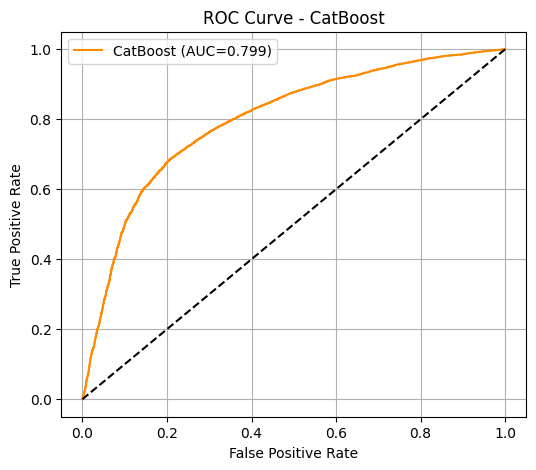

In [54]:
fpr, tpr, _ = roc_curve(ytest, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"CatBoost (AUC={auc:.3f})", color='darkorange')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CatBoost")
plt.legend()
plt.grid(True)
plt.show()